In [1]:
# Obtain Heat and Volume flux Time Series
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def Flux_TS_Sz(datapath, case_id, xidx):
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')
    Adv01 = xr.open_dataset(datapath + '/Adv_' + str(format(case_id,'03d')) + '.nc')
    Grid01 = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc')
    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    Adv = Adv01.isel(T=~Adv01.get_index("T").duplicated())
    
    state = State.isel(T=range(1,len(State.T)))
    areaW = Grid01.HFacW * Grid01.drF * Grid01.dyG # Z Y Xp1
    u = state.U.data
    
    time = Adv.T.data / 86400
    Cp = 3994  # Specific heat content J/kg/C
    rho = 999.8 # Density
    
    advp = np.zeros(len(time)) # Positive advective heat flux
    advn = np.zeros(len(time)) # Negative advective heat flux
    Qp = np.zeros(len(time)) # Positive diffusive heat flux
    Qn = np.zeros(len(time)) # Negative diffusive heat flux
    
    for t in range(len(time)):
        advx = Adv.ADVx_TH.data[t,:,:,xidx] * Cp * rho
        Qx = state.U.data[t,:,:,xidx] * areaW.data[:,:,xidx]
        
        advp[t] = advx[advx>0].sum()
        advn[t] = advx[advx<0].sum()
        
        Qp[t] = Qx[Qx>0].sum()
        Qn[t] = Qx[Qx<0].sum()
        
    #return time, advp, advn, Qp, Qn
    return Qn

In [3]:
def U_zprof(datapath, case_id, xidx):
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45),T=range(1,len(State.T)))
    
    u = state.U.data.mean(axis=(0,2))
    depth = state.Z.data
    ux = u[:,xidx]
    
    return depth, ux

In [ ]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_maxhs'

case = np.array([1,2,3,4])
f, s = 6, 120 # Indexes for Glacier front, Western sill edge

day0, day1, day2 = 7, 14, 21

# Lower-layer heat flux near the glacier front
Hs0_d0 = np.empty(len(case))
Hs0_d1 = np.empty(len(case))
Hs0_d2 = np.empty(len(case))

# Lower_layer volume flux near the glacier fron
Qs0_d0 = np.empty(len(case))
Qs0_d1 = np.empty(len(case))
Qs0_d2 = np.empty(len(case))
Qs0_mean = np.empty(len(case))
Qs1_mean = np.empty(len(case))


for i in range(len(case)):
    
    Qn0 = Flux_TS_Sz(path1, case[i], f)
    Qn1 = Flux_TS_Sz(path1, case[i], s)
    
#     Hs0_d0[i] = Hn[2*day0-1]
#     Hs0_d1[i] = Hn[2*day1-1]
#     Hs0_d2[i] = Hn[2*day2-1]
    
    Qs0_d0[i] = Qn0[2*day0-1]
    Qs0_d1[i] = Qn0[2*day1-1]
    Qs0_d2[i] = Qn0[2*day2-1]
    Qs0_mean[i] = Qn0.mean()
    Qs1_mean[i] = Qn1.mean()

In [ ]:
u1 = np.empty(90)
u1 = np.empty(90)
u1 = np.empty(90)
u1 = np.empty(90)

In [2]:
file1 = xr.open_dataset('/home/1959/Parameters/FjordModeling/3_Sz_minhs.nc')

alp11 = file1.alpha11.data
alp22 = file1.alpha22.data
Qe1 = file1.Qout1.data - file1.Qin2.data
Qsm1 = file1.Qsm.data

Ts_in = file1.Ts_in.data
Qin2 = file1.Qin2.data
Qin1 = file1.Qin1.data
Qout1 = file1.Qout1.data
Qout2 = file1.Qout2.data
Qin2_adj = file1.Qin2_adj.data
Qout2_adj = file1.Qout2_adj.data
Tf = file1.Tf.data
Ts = file1.Ts.data
#Ts[1] = 0.5 * (Ts[0]+Ts[2])
Qin1_adj = file1.Qin1_adj.data
Qout1_adj = file1.Qout1_adj.data
#alp22[alp22>1] = 0
#alp11 = (Qin1_adj-Qout2_adj) / Qin1_adj

for i in range(len(alp11)):
    if (alp22[i] < 0) or (alp11[i] > 1):
        alp11[i] = (file1.Qin1_adj.data[i]-file1.Qout2_adj.data[i]) / file1.Qin1_adj.data[i]
        alp22[i] = 0
    else:
        alp11[i] = alp11[i]
        alp22[i] = alp22[i]

Tse = (Ts_in*Qin2_adj*(1-alp22) + Tf*Qin1_adj*alp11) / Qout1_adj
alp11[-1] = (Qin1_adj[-1]-Qout2_adj[-1]) / Qin1_adj[-1]
file3 = xr.open_dataset('/home/1959/Parameters/FjordModeling/3_Sz_nosill.nc')
Qsm3 = file3.Qsm.data

In [3]:
alp11, alp22

(array([0.71530895, 0.79284436, 0.56560174, 0.50851103]),
 array([0.04242288, 0.        , 0.        , 3.58632025]))

In [ ]:
file1 = xr.open_dataset('/home/1959/Parameters/FjordModeling/3_Sal_Linear_minhs.nc')

alp11 = file1.alpha11.data
alp22 = file1.alpha22.data
Qe1 = file1.Qout1.data - file1.Qin2.data
Qsm1 = file1.Qsm.data

#Tsr1 = file1.Ts.data / file1.Ts_in.data
#Tsre1 = file1.Ts_e.data / file1.Ts_in.data
Ts_in = file1.Ts_in.data
Qin2 = file1.Qin2.data
Qin1 = file1.Qin1.data
Qout1 = file1.Qout1.data
Qout2 = file1.Qout2.data
Qin2_adj = file1.Qin2_adj.data
Qout2_adj = file1.Qout2_adj.data
Tf = file1.Tf.data
Ts = file1.Ts.data
Ts[1] = 0.5 * (Ts[0]+Ts[2])
Qin1_adj = file1.Qin1_adj.data
Qout1_adj = file1.Qout1_adj.data
#alp22[alp22>1] = 0
alp11 = (Qin1_adj-Qout2_adj) / Qin1_adj

#alp11[1] = 0.5 * (alp11[0]+alp11[2])
Tse = (Ts_in*Qin2_adj*(1-0) + Tf*Qin1_adj*alp11) / Qout1_adj
Tse[:2] = Ts[:2] - 1

# file2 = xr.open_dataset('~/Parameters/Sz_maxhs.nc')
# Qsm2 = file2.Qsm.data

file3 = xr.open_dataset('/home/1959/Parameters/FjordModeling/3_Sal_Linear_nosill.nc')
Qsm3 = file3.Qsm.data

In [ ]:
#Ts_in, np.flip(Tse), Tse/ Ts_in, Qsm1, Qsm3
#Tse, alp11, alp22, Ts
Qsm1, Qsm3

In [ ]:
fig1 = plt.figure(figsize=(12,4))
fig1.tight_layout()

# Plot vertical velocity profile
ax1 = fig1.add_subplot(131)
for j in range(len(case)):
    depth, ux = U_zprof(path1, case[j], f)
    
    ax1.plot(ux,depth,label=str(j+1)+r'$\frac{\partial S_0}{\partial z}$')
    ax1.legend(loc='best',fontsize=15)
    
ax1.axvline(x=0,color='k',linestyle=':')
ax1.set_xlabel(r'Along-fjord velocity [$m/s$]', size=15)
ax1.set_ylabel(r'Depth [$m$]', size=15)
ax1.set_title('(a)', loc='left', size=15, weight='bold')
ax1.tick_params(direction='in', labelsize=15)



# Plot Qe&Qs vs. Sz
ax2 = fig1.add_subplot(132)
# ax1.plot(case,-Qs0_d0/1e3,'o-',ms=8,label=r'day 7')
# ax1.plot(case,-Qs0_d1/1e3,'o-',ms=8,label=r'day 14')
# ax1.plot(case,-Qs0_d2/1e3,'o-',ms=8,label=r'day 21')
ax2.plot(case,(-Qs0_mean/1e3),'o-',ms=8,label=r'$Q^0_s$')
#ax1.plot(case,-Qs1_mean/1e3,'o-',ms=8,label=r'sill mean')
ax2.plot(case,(Qe1/1e3),'o-',ms=8,label=r'$Q_e$')
ax2.legend(loc='best', fontsize=15)

#line2, = ax1.plot(case,Qe1/1e3,'s-k',ms=8,label=r'$Q_e$')
#ax1.legend(handles=[line2], loc='lower right')
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xticks([1, 2, 3, 4])
ax2.set_xticklabels([r'$\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
#ax2.set_ylim([0, 15])
ax2.set_ylim([0, 12])
ax2.set_yticks([0, 3, 6, 9, 12])
ax2.set_xlabel(r'[$psu/m$]', size=15)
ax2.set_ylabel(r'Volume Flux [$\times 10^3\;m^3/s$]', size=15)
ax2.set_title('(b)', loc='left', size=15, weight='bold')
ax2.tick_params(direction='in', labelsize=15)

# Plot T,Qsm vs. Sz
ax3 = fig1.add_subplot(133)
plt.grid(linestyle = '--', linewidth = 0.5)
ax3.plot(case,(Tse/Ts_in),'s-b',ms=8,label=r'$h_s/h=0.04$')
#ax3.plot(case,alp22_1,'v-b',ms=8,label=r'$\alpha_{11}$')

#ax3.legend(loc='upper right', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.set_xticks([1,2,3,4])
ax3.set_xticklabels([r'$\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
#ax3.set_ylim([0.4, 1])
ax3.set_ylim([0.6, 1])
ax3.set_xlabel(r'[$psu/m$]', size=15)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',fontsize=15,color='b')
ax3.set_title('(c)', loc='left', size=15, weight='bold')
ax3.tick_params(direction='in', labelsize=15)
ax3.tick_params(axis='y', colors='blue')
#for side in ax2.spines.keys():  # 'top', 'bottom', 'left', 'right'
#    ax2.spines[side].set_linewidth(1.5)
#    ax2.spines[side].set_color('red')

ax4=ax3.twinx()
ax4.plot(case,(Qsm1),'o-r',ms=8,label=r'0.04')
#ax4.plot(case,Qsm2,'o--r',ms=8,label=r'0.12')
ax4.plot(case,(Qsm3),'o--r',ms=8,label=r'1')

ax4.legend(title=r'$h_s/h$',title_fontsize=15,loc='best', fontsize=15)
ax4.spines['left'].set_color('blue')
ax4.spines['right'].set_color('red')
ax4.tick_params(axis='y', colors='red')

ax4.tick_params(direction='in', labelsize=15)
ax4.set_ylim([6, 10])
#ax4.set_ylim([4.5, 8.5])
#ax3.set_yticks([1.5, 3, 4.5, 6, 7.5, 9])
ax4.set_ylabel(r"$Q_{sm}\;[m^3/s]$",fontsize=15,color='r')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.2)

In [ ]:
fig2 = plt.figure(figsize=(4,4))
fig2.tight_layout()


# Plot U in z direction
ax1 = fig2.add_subplot(111)
idx = 6
for j in range(len(case)):
    depth, ux = U_zprof(path1, case[j], idx)
    
    ax1.plot(ux,depth,label=r'case'+str(j))
    ax1.legend(loc='best')
    
ax1.axvline(x=0,color='k',linestyle=':')
    

In [ ]:
# Linear S0 plot

fig3 = plt.figure(figsize=(12,4))
fig3.tight_layout()

# Plot vertical velocity profile
ax1 = fig3.add_subplot(131)
for j in range(len(case)):
    depth, ux = U_zprof(path1, case[3-j], f)
    
    ax1.plot(ux,depth,label=str(j+1)+r'$\frac{\partial S_0}{\partial z}$')
    ax1.legend(loc='best',fontsize=15)
    
ax1.axvline(x=0,color='k',linestyle=':')
ax1.set_xlabel(r'Along-fjord velocity [$m/s$]', size=15)
ax1.set_ylabel(r'Depth [$m$]', size=15)
ax1.set_title('(a)', loc='left', size=15, weight='bold')
ax1.tick_params(direction='in', labelsize=15)



# Plot T,alpha vs. Sz
ax2 = fig3.add_subplot(132)
plt.grid(linestyle = '--', linewidth = 0.5)
ax2.plot(case,np.flip(alp11),'v-g',ms=8)
#ax2.legend(loc='best', fontsize=15)

#ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xticks([1, 2, 3, 4])
ax2.set_xticklabels([r'$1\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
ax2.set_ylim([0, .8])
#ax2.set_yticks([0, 3, 6, 9, 12])
ax2.set_xlabel(r'[$psu/m$]', size=15)
ax2.set_ylabel(r'$\alpha_{11}$', size=15, color='green')
ax2.set_title('(b)', loc='left', size=15, weight='bold')
ax2.tick_params(direction='in', labelsize=15)
ax2.tick_params(axis='y', colors='green')


ax5=ax2.twinx()
ax5.plot(case,np.flip(Qe1/1e3),'o-r',ms=8)
ax5.spines['left'].set_color('green')
ax5.spines['right'].set_color('red')
ax5.tick_params(axis='y', colors='red')

ax5.tick_params(direction='in', labelsize=15)
ax5.set_ylim([1, 7])
#ax3.set_yticks([1.5, 3, 4.5, 6, 7.5, 9])
ax5.set_ylabel(r"$Q_{e}\;[\times 10^3\;m^3/s]$",fontsize=15,color='r')


# Plot T,Qsm vs. Sz
ax3 = fig3.add_subplot(133)
plt.grid(linestyle = '--', linewidth = 0.5)
ax3.plot(case,np.flip(Tse/Ts_in),'s-b',ms=8,label=r'$h_s/h=0.04$')

#ax3.legend(loc='upper right', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.set_xticks([1,2,3,4])
ax3.set_xticklabels([r'$1\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
#ax3.set_ylim([0.4, 1])
ax3.set_ylim([0.6, 1])
ax3.set_xlabel(r'[$psu/m$]', size=15)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',fontsize=15,color='b')
ax3.set_title('(c)', loc='left', size=15, weight='bold')
ax3.tick_params(direction='in', labelsize=15)
ax3.tick_params(axis='y', colors='blue')
#for side in ax2.spines.keys():  # 'top', 'bottom', 'left', 'right'
#    ax2.spines[side].set_linewidth(1.5)
#    ax2.spines[side].set_color('red')

ax4=ax3.twinx()
ax4.plot(case,np.flip(Qsm1),'o-r',ms=8,label=r'0.04')
#ax4.plot(case,Qsm2,'o--r',ms=8,label=r'0.12')
ax4.plot(case,np.flip(Qsm3),'o--r',ms=8,label=r'1')

ax4.legend(title=r'$h_s/h$',title_fontsize=15,loc='best', fontsize=15)
ax4.spines['left'].set_color('blue')
ax4.spines['right'].set_color('red')
ax4.tick_params(axis='y', colors='red')

ax4.tick_params(direction='in', labelsize=15)
#ax4.set_ylim([6, 10])
ax4.set_ylim([4.5, 8.5])
#ax3.set_yticks([1.5, 3, 4.5, 6, 7.5, 9])
ax4.set_ylabel(r"$Q_{sm}\;[m^3/s]$",fontsize=15,color='r')

# set the spacing between subplots
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.45, 
                    hspace=0.1)

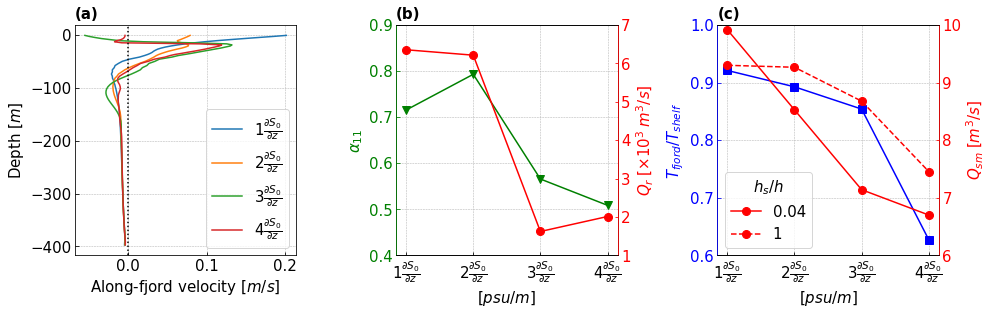

In [10]:
# Original S0 plot
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
f = 6
case = np.array([1,2,3,4])

fig4 = plt.figure(figsize=(12,4))
fig4.tight_layout()

# Plot vertical velocity profile
ax1 = fig4.add_subplot(131)
plt.grid(linestyle = '--', linewidth = 0.5)

for j in range(len(case)):
    depth, ux = U_zprof(path1, case[j], f)
    
    ax1.plot(ux,depth,label=str(j+1)+r'$\frac{\partial S_0}{\partial z}$')
    ax1.legend(loc='best',fontsize=15)
    
ax1.axvline(x=0,color='k',linestyle=':')
ax1.set_xlabel(r'Along-fjord velocity [$m/s$]', size=15)
ax1.set_ylabel(r'Depth [$m$]', size=15)
ax1.set_title('(a)', loc='left', size=15, weight='bold')
ax1.tick_params(direction='in', labelsize=15)



# Plot T,alpha vs. Sz
ax2 = fig4.add_subplot(132)
plt.grid(linestyle = '--', linewidth = 0.5)
ax2.plot(case,(alp11),'v-g',ms=8)
#ax2.legend(loc='best', fontsize=15)

#ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xticks([1, 2, 3, 4])
ax2.set_xticklabels([r'$1\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
ax2.set_ylim([0.4, 0.9])
#ax2.set_yticks([0, 3, 6, 9, 12])
ax2.set_xlabel(r'[$psu/m$]', size=15)
ax2.set_ylabel(r'$\alpha_{11}$', size=15, color='green')
ax2.set_title('(b)', loc='left', size=15, weight='bold')
ax2.tick_params(direction='in', labelsize=15)
ax2.tick_params(axis='y', colors='green')


ax5=ax2.twinx()
ax5.plot(case,(Qe1/1e3),'o-r',ms=8)
ax5.spines['left'].set_color('green')
ax5.spines['right'].set_color('red')
ax5.tick_params(axis='y', colors='red')

ax5.tick_params(direction='in', labelsize=15)
ax5.set_ylim([1, 7])
#ax3.set_yticks([1.5, 3, 4.5, 6, 7.5, 9])
ax5.set_ylabel(r"$Q_{r}\;[\times 10^3\;m^3/s]$",fontsize=15,color='r')


# Plot T,Qsm vs. Sz
ax3 = fig4.add_subplot(133)
plt.grid(linestyle = '--', linewidth = 0.5)
ax3.plot(case,(Tse/Ts_in),'s-b',ms=8,label=r'$h_s/h=0.04$')

#ax3.legend(loc='upper right', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.set_xticks([1,2,3,4])
ax3.set_xticklabels([r'$1\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
ax3.set_ylim([0.6, 1])
ax3.set_xlabel(r'[$psu/m$]', size=15)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',fontsize=15,color='b')
ax3.set_title('(c)', loc='left', size=15, weight='bold')
ax3.tick_params(direction='in', labelsize=15)
ax3.tick_params(axis='y', colors='blue')
#for side in ax2.spines.keys():  # 'top', 'bottom', 'left', 'right'
#    ax2.spines[side].set_linewidth(1.5)
#    ax2.spines[side].set_color('red')

ax4=ax3.twinx()
ax4.plot(case,(Qsm1),'o-r',ms=8,label=r'0.04')
#ax4.plot(case,Qsm2,'o--r',ms=8,label=r'0.12')
ax4.plot(case,(Qsm3),'o--r',ms=8,label=r'1')

ax4.legend(title=r'$h_s/h$',title_fontsize=15,loc='best', fontsize=15)
ax4.spines['left'].set_color('blue')
ax4.spines['right'].set_color('red')
ax4.tick_params(axis='y', colors='red')

ax4.tick_params(direction='in', labelsize=15)
ax4.set_ylim([6, 10])
#ax3.set_yticks([1.5, 3, 4.5, 6, 7.5, 9])
ax4.set_ylabel(r"$Q_{sm}\;[m^3/s]$",fontsize=15,color='r')

# set the spacing between subplots
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.45, 
                    hspace=0.1)

In [3]:
#'/Volumes/Extreme SSD/MITgcm outputs/qf700_strat/state_001.nc'
# '/Users/weiyangbao/Documents/Model_outputs/4_Sz_maxhs'
# '/work/oceans/wbao/MITgcm_results/iceplume'
#datapath = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs/'
state1 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs/state_001.nc')
state2 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs/state_002.nc')
state3 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs/state_003.nc')
state4 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs/state_004.nc')

xi, yi = 10, 35
s_ini1 = state1.S.data[0,:,yi,xi]
s_ini2 = state2.S.data[0,:,yi,xi]
s_ini3 = state3.S.data[0,:,yi,xi]
s_ini4 = state4.S.data[0,:,yi,xi]

pt_ini1 = state1.Temp.data[0,:,yi,xi]
pt_ini2 = state2.Temp.data[0,:,yi,xi]
pt_ini3 = state3.Temp.data[0,:,yi,xi]
pt_ini4 = state4.Temp.data[0,:,yi,xi]

Z = state1.Z.data

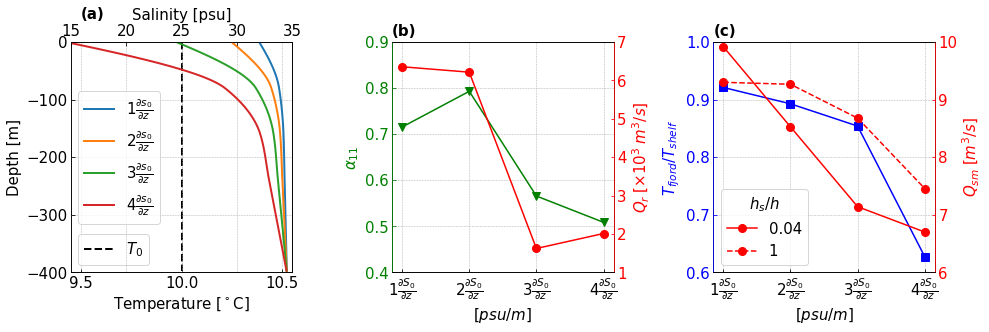

In [23]:
case = np.array([1,2,3,4])
# Original S0 plot with initial profiles

fig5 = plt.figure(figsize=(12,4))
fig5.tight_layout()


# Plot vertical velocity profile
ax5 = fig5.add_subplot(131)
#plt.grid(linestyle = '--', linewidth = 0.5)
ax5.plot(pt_ini1, Z, 'k--', lw=2, label=r'$T_0$')


ax6 = ax5.twiny()
ax6.plot(s_ini1, Z, '-', lw=2, label=r'$1\frac{\partial s_0}{\partial z}$')
ax6.plot(s_ini2, Z, '-', lw=2, label=r'$2\frac{\partial s_0}{\partial z}$')
ax6.plot(s_ini3, Z, '-', lw=2, label=r'$3\frac{\partial s_0}{\partial z}$')
ax6.plot(s_ini4, Z, '-', lw=2, label=r'$4\frac{\partial s_0}{\partial z}$')


ax5.legend(loc='lower left', fontsize=15)
ax6.legend(loc='center left', fontsize=15)

ax5.set_ylabel(r'Depth [m]', size=15)
ax5.set_ylim([-400, 0])
#ax5.set_title('(a)', loc='left', size=15, weight='bold')
ax5.text(9.5, 40, '(a)', size=15, weight='bold')
ax5.set_xlabel(r'Temperature [$^\circ$C]', size=15)
ax6.set_xlabel(r'Salinity [psu]', size=15)
ax6.set_xlim([15, 35])
ax5.grid(True,linestyle = '--', linewidth = 0.5)
ax6.grid(True,linestyle = '--', linewidth = 0.5)
ax5.tick_params(direction='in', labelsize=15)
ax6.tick_params(direction='in', labelsize=15)



# Plot T,alpha vs. Sz
ax2 = fig5.add_subplot(132)
plt.grid(linestyle = '--', linewidth = 0.5)
ax2.plot(case,(alp11),'v-g',ms=8)
#ax2.legend(loc='best', fontsize=15)

#ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xticks([1, 2, 3, 4])
ax2.set_xticklabels([r'$1\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
ax2.set_ylim([0.4, 0.9])
#ax2.set_yticks([0, 3, 6, 9, 12])
ax2.set_xlabel(r'[$psu/m$]', size=15)
ax2.set_ylabel(r'$\alpha_{11}$', size=15, color='green')
ax2.set_title('(b)', loc='left', size=15, weight='bold')
ax2.tick_params(direction='in', labelsize=15)
ax2.tick_params(axis='y', colors='green')


ax5=ax2.twinx()
ax5.plot(case,(Qe1/1e3),'o-r',ms=8)
ax5.spines['left'].set_color('green')
ax5.spines['right'].set_color('red')
ax5.tick_params(axis='y', colors='red')

ax5.tick_params(direction='in', labelsize=15)
ax5.set_ylim([1, 7])
#ax3.set_yticks([1.5, 3, 4.5, 6, 7.5, 9])
ax5.set_ylabel(r"$Q_{r}\;[\times 10^3\;m^3/s]$",fontsize=15,color='r')


# Plot T,Qsm vs. Sz
ax3 = fig5.add_subplot(133)
plt.grid(linestyle = '--', linewidth = 0.5)
ax3.plot(case,(Tse/Ts_in),'s-b',ms=8,label=r'$h_s/h=0.04$')

#ax3.legend(loc='upper right', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.set_xticks([1,2,3,4])
ax3.set_xticklabels([r'$1\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
ax3.set_ylim([0.6, 1])
ax3.set_xlabel(r'[$psu/m$]', size=15)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',fontsize=15,color='b')
ax3.set_title('(c)', loc='left', size=15, weight='bold')
ax3.tick_params(direction='in', labelsize=15)
ax3.tick_params(axis='y', colors='blue')
#for side in ax2.spines.keys():  # 'top', 'bottom', 'left', 'right'
#    ax2.spines[side].set_linewidth(1.5)
#    ax2.spines[side].set_color('red')

ax4=ax3.twinx()
ax4.plot(case,(Qsm1),'o-r',ms=8,label=r'0.04')
#ax4.plot(case,Qsm2,'o--r',ms=8,label=r'0.12')
ax4.plot(case,(Qsm3),'o--r',ms=8,label=r'1')

ax4.legend(title=r'$h_s/h$',title_fontsize=15,loc='best', fontsize=15)
ax4.spines['left'].set_color('blue')
ax4.spines['right'].set_color('red')
ax4.tick_params(axis='y', colors='red')

ax4.tick_params(direction='in', labelsize=15)
ax4.set_ylim([6, 10])
#ax3.set_yticks([1.5, 3, 4.5, 6, 7.5, 9])
ax4.set_ylabel(r"$Q_{sm}\;[m^3/s]$",fontsize=15,color='r')





# set the spacing between subplots
plt.subplots_adjust(left=0,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.45, 
                    hspace=0.1)

In [11]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
#fig1.savefig(fig_path + '/7-Stratification.png', dpi=300, bbox_inches='tight')
#fig3.savefig(fig_path + '/Linear_S0.png', dpi=300, bbox_inches='tight')
fig4.savefig(fig_path + '/Orginal_S0.png', dpi=300, bbox_inches='tight')